In [15]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [16]:
obs = load('../../Feb2021/Final_Models/Teleconnections/TSdataObs.joblib') 

In [53]:
y=obs[((obs.time.dt.month>11) | (obs.time.dt.month<2)) & 
             (obs.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))
y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0.32, 0.4 , 0.4 , ..., 0.24, 0.36, 0.36])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [60]:
AOData = xr.open_dataset('../../../Data/AO_EU/AO_Calculated.nc')

AO5D=AOData.AO.rolling(time=5).mean()

AO5DAll=AO5D[((AO5D.time.dt.month>11) | (AO5D.time.dt.month<2)) & 
             (AO5D.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))


In [61]:
def getMean( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2019,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd)).mean(dim='time').values.tolist()
        #print(yAct)
        print(yr)
        fg.append((ySMean))
        print(ySMean)
    
    return fg

In [62]:
fMean=getMean(y)
AOMean=getMean(AO5DAll)

1981
0.15806451612903222
1982
0.12129032258064516
1983
0.19741935483870965
1984
0.12129032258064516
1985
0.13032258064516128
1986
0.1703225806451613
1987
0.20838709677419348
1988
0.24129032258064514
1989
0.12322580645161292
1990
0.25161290322580643
1991
0.15161290322580642
1992
0.2329032258064516
1993
0.20193548387096774
1994
0.2032258064516129
1995
0.264516129032258
1996
0.2690322580645161
1997
0.30000000000000004
1998
0.3516129032258064
1999
0.4109677419354838
2000
0.3406451612903225
2001
0.31870967741935474
2002
0.4335483870967742
2003
0.47419354838709676
2004
0.5322580645161289
2005
0.3412903225806452
2006
0.25741935483870965
2007
0.3129032258064516
2008
0.23999999999999996
2009
0.395483870967742
2010
0.3438709677419355
2011
0.2787096774193549
2012
0.4470967741935484
2013
0.39935483870967753
2014
0.40709677419354834
2015
0.4767741935483871
2016
0.39806451612903226
2017
0.5180645161290323
2018
0.4374193548387098
1981
-0.3571655750274658
1982
-0.7162275314331055
1983
0.61619603633880

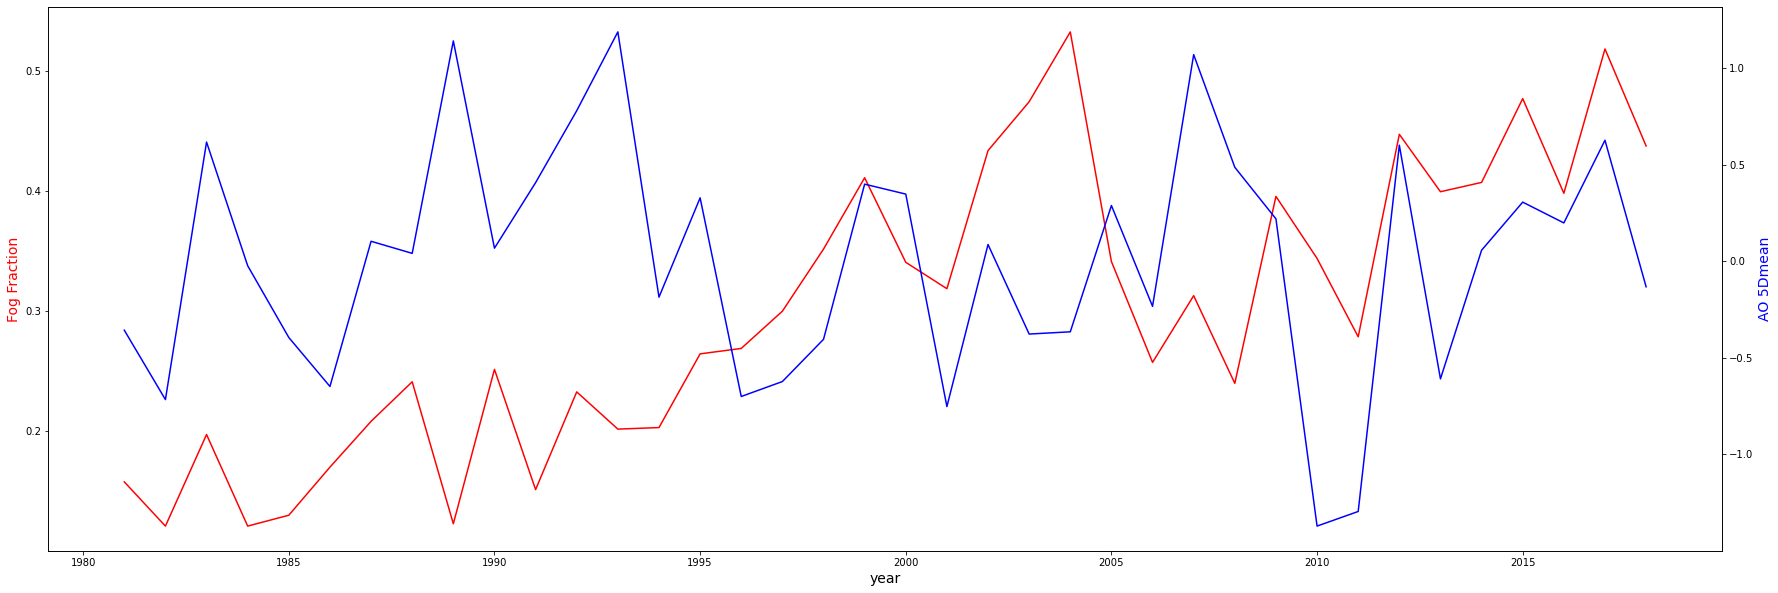

In [63]:
X=np.arange(1981,2019)

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=[30,10])
# make a plot
ax.plot(X, fMean, color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Fog Fraction",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X, AOMean,color="blue")
ax2.set_ylabel("AO 5Dmean",color="blue",fontsize=14)
plt.show()



In [64]:
X=np.arange(1981,2015)
X.shape

(34,)

In [41]:
len(fMean)

36

In [43]:
fMean

[0.15806451612903222,
 0.12129032258064516,
 0.19741935483870965,
 0.12129032258064516,
 0.13032258064516128,
 0.1703225806451613,
 0.20838709677419348,
 0.24129032258064514,
 0.12322580645161292,
 0.25161290322580643,
 0.15161290322580642,
 0.2329032258064516,
 0.20193548387096774,
 0.2032258064516129,
 0.264516129032258,
 0.2690322580645161,
 0.30000000000000004,
 0.3516129032258064,
 0.4109677419354838,
 0.3406451612903225,
 0.31870967741935474,
 0.4335483870967742,
 0.47419354838709676,
 0.5322580645161289,
 0.3412903225806452,
 0.25741935483870965,
 0.3129032258064516,
 0.23999999999999996,
 0.395483870967742,
 0.3438709677419355,
 0.2787096774193549,
 0.4470967741935484,
 0.39935483870967753,
 0.40709677419354834,
 [0.15806451612903222,
  0.12129032258064516,
  0.19741935483870965,
  0.12129032258064516,
  0.13032258064516128,
  0.1703225806451613,
  0.20838709677419348,
  0.24129032258064514,
  0.12322580645161292,
  0.25161290322580643,
  0.15161290322580642,
  0.23290322580645